In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import io
import requests

# Download zip from GitHub
response=requests.get("https://raw.githubusercontent.com/SristiSarkarMCKV/Causal-RL-for-Supply-Chain-Optimization/main/data/raw/DataCoSupplyChainDataset.zip")

# Open zip file
zip_file=zipfile.ZipFile(io.BytesIO(response.content))

# Load CSV inside zip
df=pd.read_csv(zip_file.open('DataCoSupplyChainDataset.csv'), encoding='latin1')

# Basic dataset info
print(df.shape)
print(df.columns)
df.head()

(180519, 53)
Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
     

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [2]:
# Convert date columns
df['order date (DateOrders)']=pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)']=pd.to_datetime(df['shipping date (DateOrders)'])

# Create delivery time
df['delivery_time_days']=(df['shipping date (DateOrders)']-df['order date (DateOrders)']).dt.days

# Check missing values
print(df.isnull().sum())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [3]:
# Unique customers
num_customers=df['Customer Id'].nunique()

# Unique products (proxy for suppliers)
num_products=df['Product Card Id'].nunique()

# Unique cities (proxy warehouses/shipping locations)
num_cities=df['Order City'].nunique()
num_regions=df['Order Region'].nunique()
num_countries=df['Order Country'].nunique()

print("Customers:",num_customers)
print("Products/Suppliers:",num_products)
print("Cities:",num_cities)
print("Regions:",num_regions)
print("Countries:",num_countries)

Customers: 20652
Products/Suppliers: 118
Cities: 3597
Regions: 23
Countries: 164


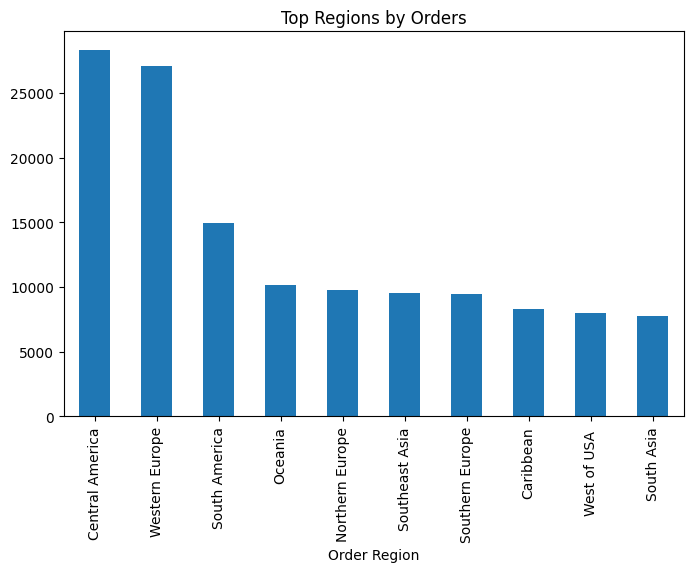

In [4]:
# Visualization of orders by regions
df['Order Region'].value_counts().head(10).plot(kind='bar',figsize=(8,5))
plt.title("Top Regions by Orders")
plt.show()

Late delivery rate: 54.83 %


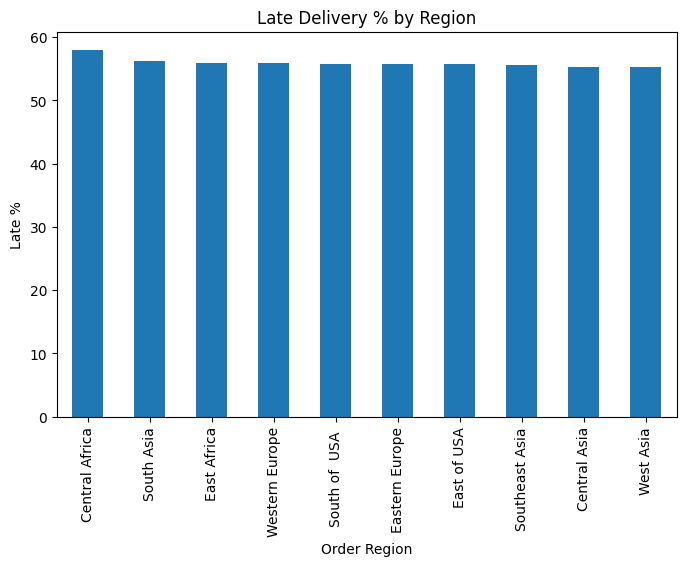

Average order value: 203.77209608617287
Average quantity: 2.127637533999191


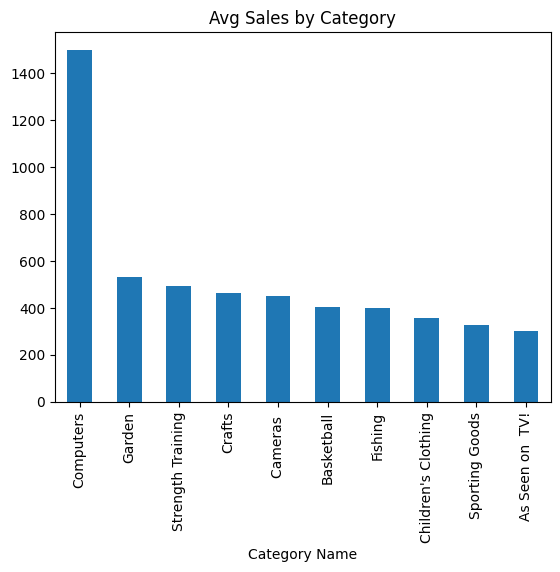

In [5]:
# QROR(Quality, Reliability, Order Fulfillment and Responsiveness) Proxy Metrices
# Late Delivery Rate
late_rate=df['Late_delivery_risk'].mean()*100
print("Late delivery rate:", round(late_rate,2),"%")
# By region
late_by_region=df.groupby('Order Region')['Late_delivery_risk'].mean()*100
late_by_region.sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,5))
plt.title("Late Delivery % by Region")
plt.ylabel("Late %")
plt.show()

# Inventory or Order Cost
# Average order value
avg_order_value=df['Sales'].mean()
print("Average order value:",avg_order_value)

# Avg quantity ordered
avg_qty=df['Order Item Quantity'].mean()
print("Average quantity:",avg_qty)

# Cost trend
df.groupby('Category Name')['Sales'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Avg Sales by Category")
plt.show()

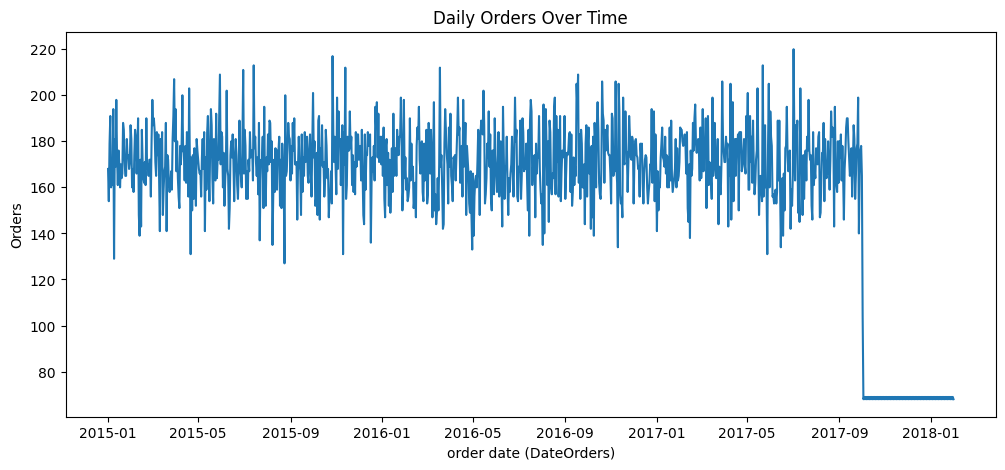

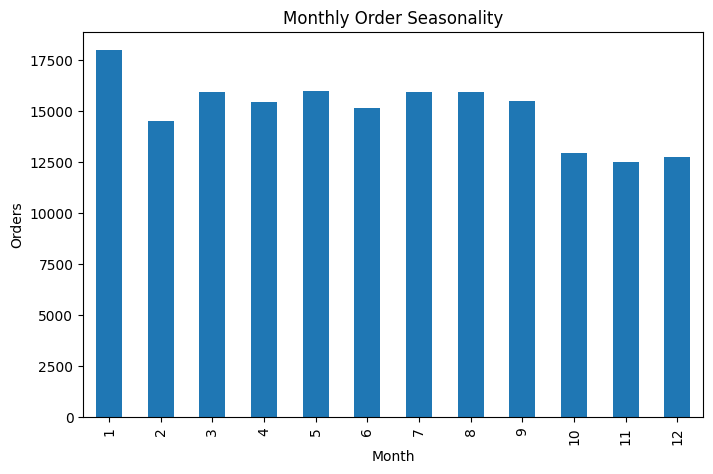

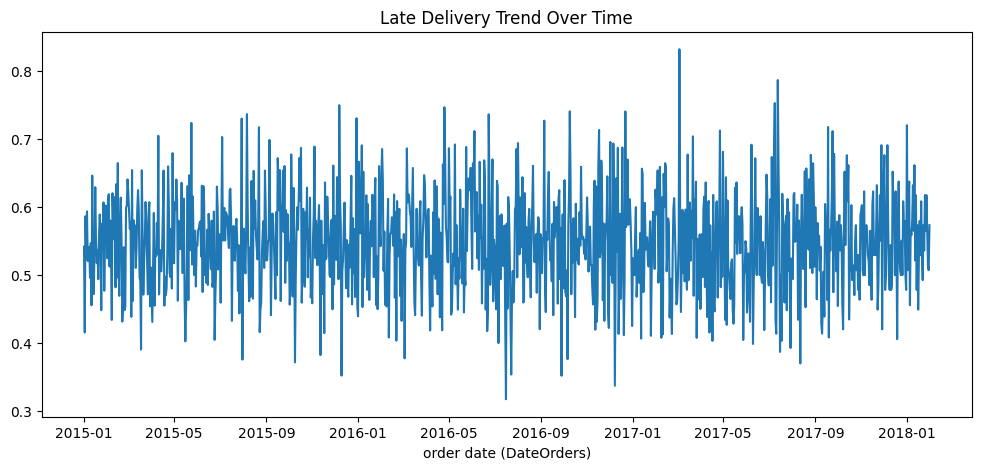

In [6]:
# Time Series Analysis: Trend and Seasonality
# Orders per day
daily_orders=df.groupby(df['order date (DateOrders)'].dt.date).size()

plt.figure(figsize=(12,5))
daily_orders.plot()
plt.title("Daily Orders Over Time")
plt.ylabel("Orders")
plt.show()

# Monthly seasonality
df['month']=df['order date (DateOrders)'].dt.month
monthly_orders=df.groupby('month').size()

monthly_orders.plot(kind='bar',figsize=(8,5))
plt.title("Monthly Order Seasonality")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.show()

# Rate of late delivery
late_time=df.groupby(df['order date (DateOrders)'].dt.date)['Late_delivery_risk'].mean()

plt.figure(figsize=(12,5))
late_time.plot()
plt.title("Late Delivery Trend Over Time")
plt.show()

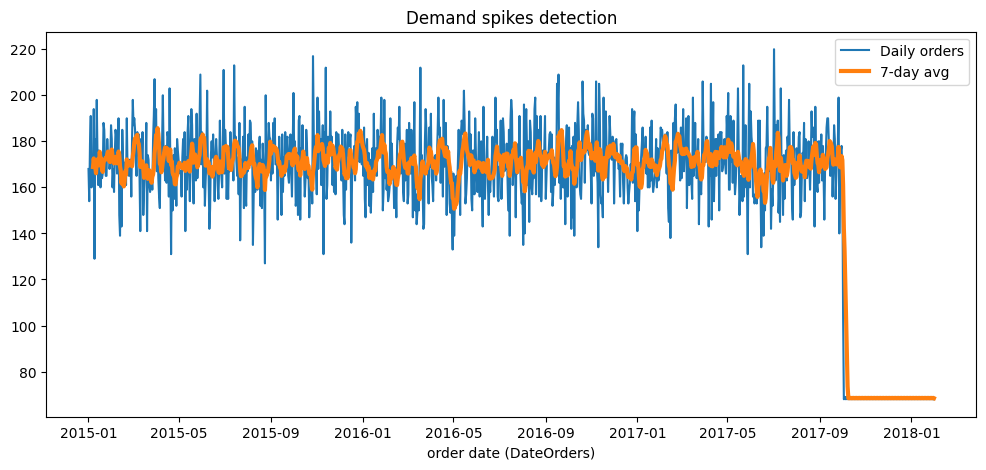

Demand spike days:
Series([], dtype: int64)
Possible disruption days:
order date (DateOrders)
2015-04-10    0.705000
2015-05-24    0.723926
2015-07-04    0.703226
2015-07-30    0.730263
2015-08-06    0.736842
2015-08-22    0.717647
2015-09-05    0.698864
2015-12-07    0.750000
2015-12-30    0.730769
2016-04-25    0.746988
2016-06-04    0.711957
2016-06-23    0.736527
2016-09-05    0.727273
2016-10-09    0.741007
2016-11-17    0.713568
2016-12-02    0.695906
2016-12-22    0.740741
2017-03-04    0.832335
2017-03-22    0.704142
2017-04-27    0.712707
2017-07-09    0.753165
2017-07-13    0.786982
2017-09-18    0.717949
2017-09-24    0.711864
2018-01-01    0.720588
Name: Late_delivery_risk, dtype: float64


In [7]:
# Demand supply disruptions
# Sudden change in demands
rolling=daily_orders.rolling(7).mean()

plt.figure(figsize=(12,5))
daily_orders.plot(label="Daily orders")
rolling.plot(label="7-day avg", linewidth=3)
plt.legend()
plt.title("Demand spikes detection")
plt.show()

# Approximate spike dates
threshold=daily_orders.mean()+2*daily_orders.std()
spikes=daily_orders[daily_orders>threshold]

print("Demand spike days:")
print(spikes)

# Supply disruptions
late_spike=late_time[late_time>late_time.mean()+2*late_time.std()]
print("Possible disruption days:")
print(late_spike)